In [3]:
import numpy as np
import pandas as pd
#from sklearn.linear_model import LogisticRegression - using statsmodels because that produces a readable summary of coefs etc.
from statsmodels.api import Logit, add_constant
from sklearn import metrics
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

C:\Users\stuar\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\stuar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\stuar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=labels,
                yticklabels=labels,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    return matrix

In [5]:
#DATA_PATH = '/content/drive/MyDrive/capstone/data'
DATA_PATH = 'C:/Users/stuar/OneDrive/Documents/Capstone/data'

In [6]:
features_df = pd.read_csv(DATA_PATH + '/features_df_2.csv')
features_df['date'] = pd.to_datetime(features_df['GAME_DATE'])

In [7]:
features_df

,GAME_DATE,HOME_PLAYER_1_POSS,HOME_PLAYER_1_TS_PCT,HOME_PLAYER_1_FG_PCT,HOME_PLAYER_1_FG3_PCT,HOME_PLAYER_1_FT_PCT,HOME_PLAYER_1_MIN_SAVG,HOME_PLAYER_1_POSS_SAVG,HOME_PLAYER_1_OREB_PAVG,HOME_PLAYER_1_DREB_PAVG,...,ROAD_PLAYER_9_PTS_FB_PAVG,ROAD_PLAYER_9_PTS_PAINT_PAVG,ROAD_PLAYER_9_OPP_PTS_OFF_TOV_PAVG,ROAD_PLAYER_9_OPP_PTS_2ND_CHANCE_PAVG,ROAD_PLAYER_9_OPP_PTS_FB_PAVG,ROAD_PLAYER_9_OPP_PTS_PAINT_PAVG,ROAD_PLAYER_9_BLKA_PAVG,ROAD_PLAYER_9_PFD_PAVG,ROAD_PLAYER_9_PLAYER_NAME,date
0,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Keyon Dooling,2000-10-31
1,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mateen Cleaves,2000-10-31
2,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Richard Hamilton,2000-10-31
3,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toni Kukoc,2000-10-31
4,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hersey Hawkins,2000-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26734,2021-05-16,4426.0,59.039270,43.880326,34.263959,88.745387,34.004839,71.387097,0.008586,0.046091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-16
26735,2021-05-16,4885.0,52.084927,41.596639,32.485323,77.153558,32.056103,68.802817,0.012078,0.056704,...,0.016358,0.116685,0.125409,0.137950,0.121047,0.430752,0.006543,0.035442,Willie Cauley-Stein,2021-05-16
26736,2021-05-16,3798.0,48.851432,36.824877,33.548387,74.814815,27.568490,59.343750,0.006582,0.048973,...,0.008734,0.052402,0.179039,0.113537,0.096070,0.436681,0.021834,0.056769,Yogi Ferrell,2021-05-16
26737,2021-05-16,1890.0,52.211582,45.609756,28.282828,86.153846,15.011944,31.500000,0.005820,0.045503,...,0.015152,0.127273,0.127273,0.087879,0.133333,0.503030,0.003030,0.057576,Donta Hall,2021-05-16


In [8]:
features_df.shape

(26739, 671)

In [9]:
features_df.describe()

,HOME_PLAYER_1_POSS,HOME_PLAYER_1_TS_PCT,HOME_PLAYER_1_FG_PCT,HOME_PLAYER_1_FG3_PCT,HOME_PLAYER_1_FT_PCT,HOME_PLAYER_1_MIN_SAVG,HOME_PLAYER_1_POSS_SAVG,HOME_PLAYER_1_OREB_PAVG,HOME_PLAYER_1_DREB_PAVG,HOME_PLAYER_1_REB_PAVG,...,ROAD_PLAYER_9_PTS_OFF_TOV_PAVG,ROAD_PLAYER_9_PTS_2ND_CHANCE_PAVG,ROAD_PLAYER_9_PTS_FB_PAVG,ROAD_PLAYER_9_PTS_PAINT_PAVG,ROAD_PLAYER_9_OPP_PTS_OFF_TOV_PAVG,ROAD_PLAYER_9_OPP_PTS_2ND_CHANCE_PAVG,ROAD_PLAYER_9_OPP_PTS_FB_PAVG,ROAD_PLAYER_9_OPP_PTS_PAINT_PAVG,ROAD_PLAYER_9_BLKA_PAVG,ROAD_PLAYER_9_PFD_PAVG
count,26340.000000,26339.000000,26339.000000,26227.000000,26187.000000,26340.000000,26340.000000,26340.000000,26340.000000,26340.000000,...,25091.000000,25091.000000,25091.000000,25091.000000,25091.000000,2.509200e+04,25091.000000,25091.000000,25091.000000,25091.000000
mean,2212.035725,53.209124,43.122661,34.089505,80.405172,31.143968,62.120639,0.010608,0.044866,0.055446,...,0.027428,0.025517,0.019344,0.069409,0.175382,inf,0.128490,0.409017,0.009659,0.026591
std,1440.177678,5.745884,4.920583,9.409431,9.403146,6.234052,12.417178,0.006228,0.014674,0.017755,...,0.017562,0.020273,0.017098,0.043274,0.047043,NaN,0.043214,0.075116,0.008395,0.023611
min,3.000000,0.000000,0.000000,0.000000,0.000000,1.233333,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1008.000000,50.095508,40.446650,30.769231,75.925926,27.837879,55.478940,0.006610,0.035955,0.044286,...,0.016706,0.012346,0.006792,0.037736,0.154011,1.175060e-01,0.106509,0.371882,0.004623,0.000427
50%,2014.000000,53.292894,43.237251,35.135135,81.432749,32.445508,64.708976,0.009207,0.042624,0.052475,...,0.026125,0.021809,0.016524,0.064103,0.173752,1.354293e-01,0.127907,0.412144,0.008621,0.026012
75%,3259.000000,56.659718,45.906433,38.961039,86.333169,35.465140,70.833333,0.013193,0.050633,0.062918,...,0.036018,0.035265,0.027823,0.094862,0.195185,1.534091e-01,0.148148,0.449302,0.012987,0.040541
max,7149.000000,102.848101,87.500000,100.000000,100.000000,48.233333,98.000000,0.078261,0.177419,0.205128,...,0.285714,0.500000,0.272727,0.600000,1.166667,inf,1.000000,2.000000,0.333333,1.000000


In [10]:
features_df['WIN']

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
26734    1.0
26735    1.0
26736    1.0
26737    1.0
26738    0.0
Name: WIN, Length: 26739, dtype: float64

In [11]:
min_poss = 200

features_df2 = features_df.drop(features_df.columns[features_df.columns.str.contains('GAME_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PLAYER_NAME')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_MIN_SAVG')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_POSS_SAVG')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PERCENT_PLAY')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PTS_PAVG')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_REB_PAVG')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_FG_PCT')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_FG3_PCT')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_FT_PCT')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('HOME_PLAYER_9_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('ROAD_PLAYER_9_')], axis=1)

print(features_df2.shape)
features_df2 = features_df2[features_df2['HOME_PLAYER_1_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_2_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_3_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_4_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_5_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_6_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_7_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_8_POSS'] >= min_poss]
#features_df2 = features_df2[features_df2['HOME_PLAYER_9_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_1_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_2_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_3_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_4_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_5_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_6_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_7_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_8_POSS'] >= min_poss]
#features_df2 = features_df2[features_df2['ROAD_PLAYER_9_POSS'] >= min_poss]
print(features_df2.shape)

features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('NUM_GAMES')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_POSS')], axis=1)
features_df2 = features_df2.dropna()

print(features_df2.shape)


(26739, 467)
(21152, 467)
(21152, 450)


In [12]:
#features_df2.columns[:100]

In [13]:
cutoff_date = pd.to_datetime('2014-04-16')
cutoff_date

train = features_df2[features_df2['date'] <= cutoff_date]
test = features_df2[features_df2['date'] > cutoff_date]

x_train = train.drop(['date','WIN'], axis=1)
y_train = train['WIN']
x_test = test.drop(['date','WIN'], axis=1)
y_test = test['WIN']

In [14]:
x_train.shape

(14229, 448)

In [15]:
x_test.shape

(6923, 448)

In [16]:
log_reg = Logit(y_train, add_constant(x_train)).fit()

C:\Users\stuar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.570831
         Iterations 7


In [17]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    WIN   No. Observations:                14229
Model:                          Logit   Df Residuals:                    13780
Method:                           MLE   Df Model:                          448
Date:                Fri, 15 Apr 2022   Pseudo R-squ.:                  0.1506
Time:                        20:43:46   Log-Likelihood:                -8122.4
converged:                       True   LL-Null:                       -9562.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.6030      2.376      0.254      0.800      -4.054       5.260
HOME_PLAYER_1_TS_PCT                      0.0080      0.007      1.115      0.265      -0.006       0.022
HOME_PLAYER_1_OREB_PAVG                 -24.8164     35.252     -0.704      0.481     -93.910      44.277
HOME_PLAYER_1_DREB_PAVG                 -24.2314     20.105     -1.205      0.228     -63.637      15.174
HOME_PLAYER_1_AST_PAVG                   -0.3684      7.748     -0.048      0.962     -15.554      14.817
HOME_PLAYER_1_STL_PAVG                   -0.9610      4.153     -0.231      0.817      -9.100       7.178
HOME_PLAYER_1_BLK_PAVG                   -3.6250      8.541     -0.424      0.671     -20.365      13.115
HOME_PLAYER_1_TOV_PAVG                   -3.3740     10.929     -0.309      0.758     -24.795      18.047
HOME_PLAYER_1_PF_PAVG                    -5.0195      2.518     -1.993      0.046      -9.956      -0.083
HOME_PLAYER_1_FTA_PAVG                   -6.4703      1.856     -3.486      0.000     -10.108      -2.832
HOME_PLAYER_1_AST_PCT_ADJ_PAVG            1.4657      2.258      0.649      0.516      -2.961       5.892
HOME_PLAYER_1_AST_RATIO_ADJ_PAVG         -0.0037      0.014     -0.264      0.792      -0.031       0.024
HOME_PLAYER_1_OFF_RATING_ADJ_PAVG         0.0243      0.012      2.105      0.035       0.002       0.047
HOME_PLAYER_1_DEF_RATING_ADJ_PAVG        -0.0358      0.012     -2.926      0.003      -0.060      -0.012
HOME_PLAYER_1_USG_PCT_ADJ_PAVG            1.6671      2.245      0.743      0.458      -2.732       6.067
HOME_PLAYER_1_OREB_PCT_ADJ_PAVG          21.9362     21.250      1.032      0.302     -19.712      63.585
HOME_PLAYER_1_DREB_PCT_ADJ_PAVG          13.2486     10.874      1.218      0.223      -8.065      34.562
HOME_PLAYER_1_REB_PCT_ADJ_PAVG           -4.1041     29.026     -0.141      0.888     -60.995      52.786
HOME_PLAYER_1_TM_TOV_PCT_ADJ_PAVG         0.0236      0.032      0.733      0.463      -0.039       0.087
HOME_PLAYER_1_PTS_OFF_TOV_PAVG           -1.3993      3.227     -0.434      0.665      -7.725       4.926
HOME_PLAYER_1_PTS_2ND_CHANCE_PAVG         4.3521      4.198      1.037      0.300      -3.875      12.580
HOME_PLAYER_1_PTS_FB_PAVG                 3.5572      2.216      1.605      0.108      -0.786       7.900
HOME_PLAYER_1_PTS_PAINT_PAVG              1.7645      1.259      1.401      0.161      -0.704       4.233
HOME_PLAYER_1_OPP_PTS_OFF_TOV_PAVG       -1.2081      2.117     -0.571      0.568      -5.358       2.941
HOME_PLAYER_1_OPP_PTS_2ND_CHANCE_PAVG     2.2991      2.360      0.974      0.330      -2.326       6.924
HOME_PLAYER_1_OPP_PTS_FB_PAVG             4.2612      2.012      2.118      0.034       0.318       8.204
HOME_PLAYER_1_OPP_PTS_PAINT_PAVG         -2.1858      1.330     -1.643      0.100      -4.793       0.421
HOME_PLAYER_1_BLKA_PAVG                 -20.0455      6.938  

In [18]:
yhat = log_reg.predict(add_constant(x_test))

In [19]:
yhat >= 0.5

18119     True
18133    False
18137     True
18138    False
18140     True
         ...  
26731     True
26733     True
26735    False
26736    False
26737     True
Length: 6923, dtype: bool

In [20]:
y_test

18119    1.0
18133    1.0
18137    1.0
18138    0.0
18140    1.0
        ... 
26731    1.0
26733    0.0
26735    1.0
26736    1.0
26737    1.0
Name: WIN, Length: 6923, dtype: float64

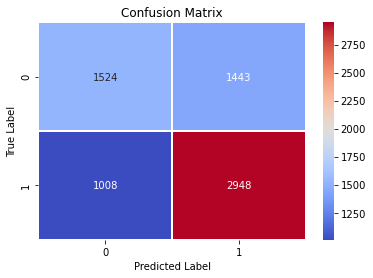

array([[1524, 1443],
       [1008, 2948]], dtype=int64)

In [21]:
labels = ["0", "1"]
show_confusion_matrix(y_test, yhat >= 0.5)

In [22]:
print(metrics.classification_report(y_test, yhat >= 0.5))

              precision    recall  f1-score   support

         0.0       0.60      0.51      0.55      2967
         1.0       0.67      0.75      0.71      3956

    accuracy                           0.65      6923
   macro avg       0.64      0.63      0.63      6923
weighted avg       0.64      0.65      0.64      6923



In [23]:
metrics.roc_auc_score(y_test, yhat)

0.6893921270135971

In [24]:
print(metrics.classification_report(y_test, yhat >= 0))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2967
         1.0       0.57      1.00      0.73      3956

    accuracy                           0.57      6923
   macro avg       0.29      0.50      0.36      6923
weighted avg       0.33      0.57      0.42      6923



C:\Users\stuar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stuar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\stuar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
